In [1]:
import pandas as pd
import h5py
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [2]:
nsfg_data = h5py.File('nsfg.hdf5', 'r')
list(nsfg_data.keys())

['nsfg']

In [3]:
nsfg = nsfg_data.get('nsfg')

In [4]:
nsfg.items()

ItemsViewHDF5(<HDF5 group "/nsfg" (6 members)>)

In [5]:
columns = nsfg.get('axis0')
columns

<HDF5 dataset "axis0": shape (10,), type "|S12">

In [6]:
for col in columns:
    print(col)

b'caseid'
b'outcome'
b'birthwgt_lb1'
b'birthwgt_oz1'
b'prglngth'
b'nbrnaliv'
b'agecon'
b'agepreg'
b'hpagelb'
b'wgt2013_2015'


In [7]:
items_0 = np.array(nsfg.get('block0_items'))
items_v0 = np.array(nsfg.get('block0_values'))
items_1 = np.array(nsfg.get('block1_items'))
items_v1 = np.array(nsfg.get('block1_values'))

In [8]:
items_0[:5]

array([b'caseid', b'outcome', b'prglngth', b'agecon'], dtype='|S8')

In [9]:
items_v0[:5]

array([[60418,     1,    40,  2000],
       [60418,     1,    36,  2291],
       [60418,     1,    36,  3241],
       [60419,     6,    33,  3650],
       [60420,     1,    41,  2191]])

In [10]:
items_1[:5]

array([b'birthwgt_lb1', b'birthwgt_oz1', b'nbrnaliv', b'agepreg',
       b'hpagelb'], dtype='|S12')

In [11]:
items_v1[:5]

array([[5.00000000e+00, 4.00000000e+00, 1.00000000e+00, 2.07500000e+03,
        2.20000000e+01, 3.55496484e+03],
       [4.00000000e+00, 1.20000000e+01, 1.00000000e+00, 2.35800000e+03,
        2.50000000e+01, 3.55496484e+03],
       [5.00000000e+00, 4.00000000e+00, 1.00000000e+00, 3.30800000e+03,
        5.20000000e+01, 3.55496484e+03],
       [           nan,            nan,            nan,            nan,
                   nan, 2.48453536e+03],
       [8.00000000e+00, 1.30000000e+01, 1.00000000e+00, 2.26600000e+03,
        2.40000000e+01, 2.90378291e+03]])

In [12]:
item_val = np.hstack((items_v0, items_v1))
item_val[:2]

array([[6.04180000e+04, 1.00000000e+00, 4.00000000e+01, 2.00000000e+03,
        5.00000000e+00, 4.00000000e+00, 1.00000000e+00, 2.07500000e+03,
        2.20000000e+01, 3.55496484e+03],
       [6.04180000e+04, 1.00000000e+00, 3.60000000e+01, 2.29100000e+03,
        4.00000000e+00, 1.20000000e+01, 1.00000000e+00, 2.35800000e+03,
        2.50000000e+01, 3.55496484e+03]])

In [13]:
item_val.shape

(9358, 10)

In [14]:
cols = ['caseid', 'outcome', 'prglngth', 'agecon', 'birthwgt_lb1',
        'birthwgt_oz1', 'nbrnaliv', 'agepreg', 'hpagelb', 'wgt2013_2015']

In [15]:
nsfg = pd.DataFrame(item_val, columns=cols)
nsfg.head()

caseid  outcome  prglngth  agecon  birthwgt_lb1  birthwgt_oz1  nbrnaliv  \
0  60418.0      1.0      40.0  2000.0           5.0           4.0       1.0   
1  60418.0      1.0      36.0  2291.0           4.0          12.0       1.0   
2  60418.0      1.0      36.0  3241.0           5.0           4.0       1.0   
3  60419.0      6.0      33.0  3650.0           NaN           NaN       NaN   
4  60420.0      1.0      41.0  2191.0           8.0          13.0       1.0   

   agepreg  hpagelb  wgt2013_2015  
0   2075.0     22.0   3554.964843  
1   2358.0     25.0   3554.964843  
2   3308.0     52.0   3554.964843  
3      NaN      NaN   2484.535358  
4   2266.0     24.0   2903.782914

In [45]:
nsfg['birthwgt_lb1'].unique()

array([ 5.,  4., nan,  8.,  6.,  7.,  3., 10.,  1.,  9., 11., 12.,  2.,
       99., 14.,  0., 13., 98., 17.])

In [46]:
nsfg['birthwgt_lb1'].replace([98, 99], np.nan, inplace=True)

### weight in ounce

In [47]:
nsfg['birth_weight'] = (nsfg['birthwgt_lb1'] * 16) + nsfg['birthwgt_oz1']
nsfg['birth_weight'].describe()

count    6390.000000
mean      114.452269
std        23.760034
min         0.000000
25%       102.000000
50%       115.000000
75%       128.000000
max       287.000000
Name: birth_weight, dtype: float64

In [16]:
# outcome
nsfg.outcome.describe()

count    9358.000000
mean        1.773990
std         1.348648
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: outcome, dtype: float64

In [17]:
nsfg['outcome'].value_counts()

1.0    6489
4.0    1469
2.0     947
6.0     249
5.0     118
3.0      86
Name: outcome, dtype: int64

**Outcome**
1: Live birth
2: Induced Abortion
3: Still Birth
4: Miscarriage
5: Ectopic Pregnancy
6: Current Pregnancy

### converting 'outcome' column into category and renaming

In [19]:
nsfg['outcome'] = nsfg['outcome'].astype('category')
mapping = {
    1: 'live_birth', 2: 'induced_abortion', 3: 'still_birth',
    4: 'miscarriage', 5: 'ectopic_preg', 6: 'current_preg'
}
nsfg['outcome'] = nsfg['outcome'].cat.rename_categories(mapping)
nsfg['outcome'].value_counts()

live_birth          6489
miscarriage         1469
induced_abortion     947
current_preg         249
ectopic_preg         118
still_birth           86
Name: outcome, dtype: int64

### 'nbrnalive' column
How many babies did one had that were born alive?

1: 1 baby

2: 2 baby

3-6: 3 or more babies

8: inapplicable

In [20]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [21]:
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)
nsfg['nbrnaliv'] = nsfg['nbrnaliv'].astype('category')
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of pregnancy.

In [22]:
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg'] / 100
preg_length = agepreg - agecon
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

## Filter and Visualize

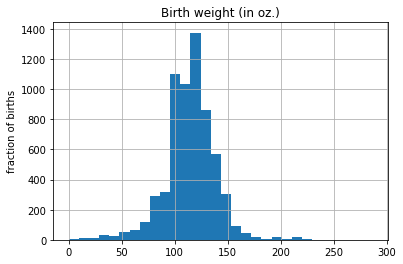

In [48]:
fig, ax = plt.subplots()

nsfg.hist('birth_weight', bins=30, ax=ax)
ax.set(title='Birth weight (in oz.)',
      ylabel='fraction of births')
plt.show()

In [49]:
# pre-matured babies
pre_term = nsfg['prglngth'] < 37
pre_term.sum()

3742

In [50]:
pre_term.mean()

0.39987176747168196

In [51]:
# filtering
pre_term_wt = nsfg.loc[pre_term, 'birth_weight']

In [52]:
pre_term_wt.mean()

89.63269876819709

In [53]:
full_term_wt = nsfg.loc[~pre_term, 'birth_weight']
full_term_wt.mean()

118.4842641440786

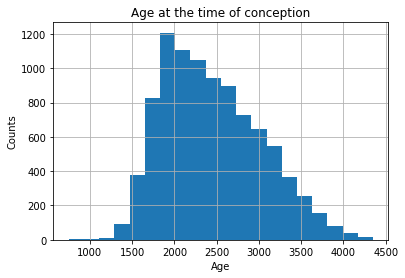

In [55]:
# Histogram of 'agecon'

fig, ax = plt.subplots()

nsfg.hist('agecon', bins=20, ax=ax)
ax.set(title='Age at the time of conception',
       xlabel='Age',
       ylabel='Counts')
plt.show()

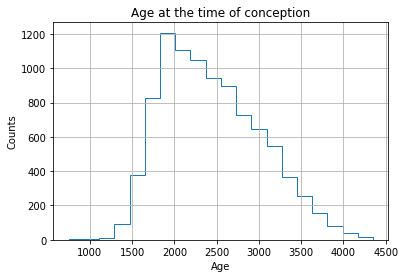

In [56]:
fig, ax = plt.subplots()

nsfg.hist('agecon', bins=20, histtype='step', ax=ax)
ax.set(title='Age at the time of conception',
       xlabel='Age',
       ylabel='Counts')
plt.show()

In [57]:
# Babies weight and 1st pregnancy...
single = nsfg['nbrnaliv'] == 1

In [58]:
single_full_term_weight = nsfg.loc[(~pre_term & single), 'birth_weight']
single_full_term_weight.mean()

118.70047688921497

In [59]:
# for others
mult_full_term_weight = nsfg.loc[(~pre_term & ~single), 'birth_weight']
mult_full_term_weight.mean()

92.28888888888889